In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

## Read in the cleaned dataframe from Lab 1 

##### This brings in our data set. We are also removing columns that would not be available to us before the horse race. This is to keep us within the spirit of the competition of could we accurately preditct a winner before the race starts. The removed columns are taken during the race and would more or less give us a certain answer as to the winner

In [2]:
# Read in the cleaned dataframe from Lab 1 
url = "https://raw.githubusercontent.com/nedeinlein/Machine_Learning_I/main/runs_clean.csv"
runs_df = pd.read_csv(url, index_col=False)
runs_df = runs_df.drop(['race_id','result','lengths_behind','position_sec1','position_sec2','position_sec3','behind_sec1','behind_sec2','behind_sec3','time1','time2','time3','finish_time'],axis = 1)

## One hot encode

##### Creating one hot encode for categorical variables. Also dropping horse_gear due to it's lack of validity in the model

In [3]:
tmp_df = pd.get_dummies(runs_df.horse_country,prefix='horse_country')
runs_df_onehot = pd.concat((runs_df,tmp_df),axis=1)

tmp_df = pd.get_dummies(runs_df.horse_type,prefix='horse_type')
runs_df_onehot = pd.concat((runs_df_onehot,tmp_df),axis=1)

#Drop old columns
runs_df_onehot = runs_df_onehot.drop(['horse_country','horse_type','horse_gear'],axis = 1)

## Split train test

##### Running simple code to remove labels for test and split model into test and train sets based on 80/20 split

In [4]:
runs_data = runs_df_onehot.drop(['won'], axis=1)
runs_target = runs_df_onehot['won']

X_train,X_test,Y_train,Y_test = train_test_split(runs_data,runs_target,test_size=0.20,random_state=0)
X_train.head()

,Unnamed: 0,horse_no,horse_id,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,...,horse_country_ZIM,horse_type_Brown,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
62425,62447,1,2453,5,85,1133.0,131,10,13.0,3.2,...,0,0,0,0,1,0,0,0,0,0
39062,39082,8,4281,3,60,984.0,116,1,80.0,11.0,...,0,0,0,0,1,0,0,0,0,0
59609,59631,9,154,3,60,1200.0,119,12,12.0,3.1,...,0,0,0,0,1,0,0,0,0,0
21589,21609,11,1872,3,60,1105.0,115,5,6.3,2.3,...,0,0,0,0,1,0,0,0,0,0
70137,70160,13,3141,4,18,1040.0,115,3,9.8,2.3,...,0,0,0,0,1,0,0,0,0,0


## Standard Scaler

##### Going through and standardizing the scale of all continuous variables to avoid unwanted skew based on variace weight

In [5]:
scl_obj = StandardScaler()
X_train_scaled = scl_obj.fit_transform(X_train, y = None)
X_test_scaled = scl_obj.fit_transform(X_test, y = None)


## SVM

##### Starting to build out SVM to assist logistic regression. This will involve training and manipulating the constants.
##### SVM1

Accuracy: 0.5760151085930123
Sensitivity 0.8276409849086577
Specificity 0.13783068783068783
auc; 0.6909981213344054
[[8108 6518]
 [ 217 1042]]


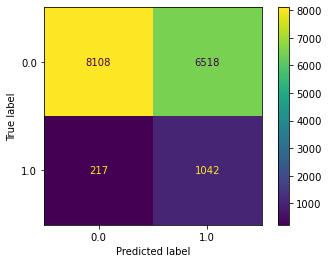

In [6]:
# train the model
svm_clf = SVC(C=0.5, kernel='rbf', gamma='auto',class_weight = 'balanced') # get object
svm_clf.fit(X_train_scaled,Y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(Y_test,y_hat)
sen = mt.recall_score(Y_test,y_hat)
spe = mt.precision_score(Y_test,y_hat)
conf = mt.confusion_matrix(Y_test,y_hat)
auc=roc_auc_score(Y_test,y_hat)
print('Accuracy:', acc )
print('Sensitivity',sen)
print('Specificity',spe)
print('auc;',auc)
print(conf)
disp=ConfusionMatrixDisplay(confusion_matrix=conf,  display_labels=svm_clf.classes_)
disp.plot()

##### SVM 2

In [ ]:
# train the model
svm_clf = SVC(C=100, kernel='rbf', gamma='auto',class_weight = 'balanced') # get object
svm_clf.fit(X_train_scaled,Y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(Y_test,y_hat)
sen = mt.recall_score(Y_test,y_hat)
spe = mt.precision_score(Y_test,y_hat)
conf = mt.confusion_matrix(Y_test,y_hat)
auc=roc_auc_score(Y_test,y_hat)
print('Accuracy:', acc )
print('Sensitivity',sen)
print('Specificity',spe)
print('auc;',auc)
print(conf)
disp=ConfusionMatrixDisplay(confusion_matrix=conf,  display_labels=svm_clf.classes_)
disp.plot()

##### SVM3

In [ ]:
# train the model
svm_clf = SVC(C=10, kernel='rbf', gamma='auto',class_weight = 'balanced') # get object
svm_clf.fit(X_train_scaled,Y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(Y_test,y_hat)
sen = mt.recall_score(Y_test,y_hat)
spe = mt.precision_score(Y_test,y_hat)
conf = mt.confusion_matrix(Y_test,y_hat)
auc=roc_auc_score(Y_test,y_hat)
print('Accuracy:', acc )
print('Sensitivity',sen)
print('Specificity',spe)
print('auc;',auc)
print(conf)
disp=ConfusionMatrixDisplay(confusion_matrix=conf,  display_labels=svm_clf.classes_)
disp.plot()

##### Introducing PCA to the SVM.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pca = PCA(n_components = 0.90)

pca_train = X_train[['horse_age','horse_rating','declared_weight','actual_weight','draw','win_odds','place_odds']]
x_pcatrain = pca.fit(pca_train).transform(pca_train)
train_rescaled = scaler.fit_transform(x_pcatrain)
x_pcatrain_scaled = pd.DataFrame(train_rescaled)


pca_test = X_test[['horse_age','horse_rating','declared_weight','actual_weight','draw','win_odds','place_odds']]
x_pcatest = pca.fit(pca_test).transform(pca_test)
test_rescaled = scaler.fit_transform(x_pcatest)
x_pcatest_scaled = pd.DataFrame(x_pcatest)


print(x_pcatrain_scaled.head())
print(x_pcatest_scaled.head())

###### This cuts down our dataset size to two columns

##### SVM using PCA data
##### SVM1

In [ ]:
# train the model
svm_clf = SVC(C=.5, kernel='rbf', gamma='auto',class_weight = 'balanced') # get object
svm_clf.fit(x_pcatrain_scaled,Y_train)  # train object

y_hat = svm_clf.predict(x_pcatest_scaled) # get test set precitions

acc = mt.accuracy_score(Y_test,y_hat)
sen = mt.recall_score(Y_test,y_hat)
spe = mt.precision_score(Y_test,y_hat)
conf = mt.confusion_matrix(Y_test,y_hat)
auc=roc_auc_score(Y_test,y_hat)
print('Accuracy:', acc )
print('Sensitivity',sen)
print('Specificity',spe)
print('auc;',auc)
print(conf)
disp=ConfusionMatrixDisplay(confusion_matrix=conf,  display_labels=svm_clf.classes_)
disp.plot()

##### SVM2

In [ ]:
# train the model
svm_clf = SVC(C=20, kernel='rbf', gamma='auto',class_weight = 'balanced') # get object
svm_clf.fit(x_pcatrain,Y_train)  # train object

y_hat = svm_clf.predict(x_pcatest_scaled) # get test set precitions

acc = mt.accuracy_score(Y_test,y_hat)
sen = mt.recall_score(Y_test,y_hat)
spe = mt.precision_score(Y_test,y_hat)
conf = mt.confusion_matrix(Y_test,y_hat)
auc=roc_auc_score(Y_test,y_hat)
print('Accuracy:', acc )
print('Sensitivity',sen)
print('Specificity',spe)
print('auc;',auc)
print(conf)
disp=ConfusionMatrixDisplay(confusion_matrix=conf,  display_labels=svm_clf.classes_)
disp.plot()

##### SVM3

In [ ]:
# train the model
svm_clf = SVC(C=10, kernel='rbf', gamma='auto',class_weight = 'balanced') # get object
svm_clf.fit(x_pcatrain,Y_train)  # train object

y_hat = svm_clf.predict(x_pcatest_scaled) # get test set precitions

acc = mt.accuracy_score(Y_test,y_hat)
sen = mt.recall_score(Y_test,y_hat)
spe = mt.precision_score(Y_test,y_hat)
conf = mt.confusion_matrix(Y_test,y_hat)
auc=roc_auc_score(Y_test,y_hat)
print('Accuracy:', acc )
print('Sensitivity',sen)
print('Specificity',spe)
print('auc;',auc)
print(conf)
disp=ConfusionMatrixDisplay(confusion_matrix=conf,  display_labels=svm_clf.classes_)
disp.plot()